# Part I. One-sided finite differences

Write a function, `deriv`, which computes a derivative of its argument at a given point, $x$, using a one-sided finite difference rule with a given step side $h$, with the approximation order of $O(h^2)$. 

In [8]:
def deriv(f, x, h):
    """ Compute a derivative of `f` at point `x` with step size `h`.
    
    Compute the derivative using the one-sided rule of the approximation order of $O(h^2)$.
    
    Parameters
    ----------
    f : callable
        The function to differentiate
    x : float
        The point to compute the derivative at.
    h : float
        The step size for the finite different rule.
        
    Returns
    -------
    fder : derivative of f(x) at point x using the step size h.
    """
    return (-1.5*f(x) + 2*f(x+h) - 0.5*f(x+2*h))/h

#### Test I.1

Test your function on a simple test case: differentiate $f(x) = x^3$ at $x=0$. Comment on whether your results are consistent with the expected value of $f'(x) = 0$ and on an expected scaling with $h\to 0$.

 (10% of the total grade)

In [9]:
x = 0
for h in [1e-2, 1e-3, 1e-4, 1e-5]:
    err = deriv(lambda x: x**3, x, h)
    print("%5f -- %7.4g" % (h, err))

0.010000 -- -0.0002
0.001000 --  -2e-06
0.000100 --  -2e-08
0.000010 --  -2e-10


ошибка убывает квадратично с каждым шагом

### Test I.2

Now use a slightly more complicated function, $f(x) = x^2 \log{x}$, evaluate the derivative at $x=1$ using your one-sided rule and a two-point one-sided rule. Roughly estimate the value of $h$ where the error stops decreasing, for these two schemes. 
(15% of the total grade)

In [10]:
from math import log

def f(x):
    return x**2 * log(x)
    
def fder(x):
    return x * (2.*log(x) + 1)


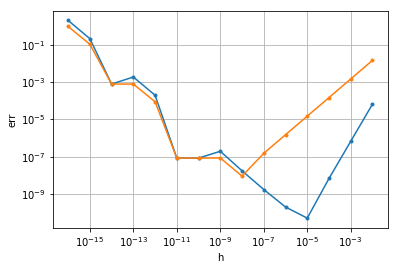

In [73]:
import matplotlib.pyplot as plt
import numpy as np

def der_2p(f, x, h):
    return (f(x+h)-f(x))/(h)

h = np.array([10.**i for i in range(-2, -17, -1)])

for i in range(h.shape[0]):
    err1[i] = deriv(f,1.,h[i])
    err2[i] = der_2p(f, 1.,h[i])
    
plt.plot(h,abs(err1-fder(1.)),".-" )
plt.plot(h,abs(err2-fder(1.)), ".-")
plt.xlabel('h')
plt.ylabel('err')
plt.xscale('log')
plt.yscale('log')
plt.grid()


### Test I.3 

Now try differentiating $x^2 \log(x)$ at $x=0$. Use the three-point one-sided rule. Note that to evaluate the function at zero, you need to special-case this value. Check the scaling of the error with $h$, explain your results. 
(25% of the total grade)

In [56]:
def f(x):
    if x == 0:
        # the limit of $x^2 log(x)$ at $x-> 0$ is zero, even though log(x) is undefined at x=0
        return 0.0
    else:
        return x**2 * log(x)
    
def fder(x):
    if x == 0:
        return 0.0

    else:
        return x*(2*log(x) + 1)

x = 0
for h in [1e-2, 1e-3, 1e-4, 1e-5]:
    err = deriv(f, x, h) - fder(x)
    print("%5f -- %7.4g" % (h, err))

0.010000 -- -0.01386
0.001000 -- -0.001386
0.000100 -- -0.0001386
0.000010 -- -1.386e-05


Остаточный член получается из третьей производной. СХодимость теперь не квадратичная, а линейная.


# Part II. Midpoint rule 

Write a function which computes a definite integral using the midpoint rule up to a given error, $\epsilon$. Estimate the error by comparing the estimates of the integral at $N$ and $2N$ elementary intervals. 

In [30]:
def midpoint_rule(func, a, b, eps, double=False):
    """ Calculate the integral of f from a to b using the midpoint rule.
    
    Parameters
    ----------
    func : callable
        The function to integrate.
    a : float
        The lower limit of integration.
    b : float
        The upper limit of integration.
    eps : float
        The target accuracy of the estimate.
        
    Returns
    -------
    integral : float
        The estimate of $\int_a^b f(x) dx$.
    """
    I = (b-a)*func((a+b)/2)
    for N in range(5, 100000):
        if double == True:
            dots = np.linspace(a, b, 2*N)
        else:
            dots = np.linspace(a, b, N)
        points = (dots[1:]+dots[:-1])/2
        h = dots[1]-dots[0]
        I_new = h*np.sum(func(points))
        if abs(I_new-I)<eps:
            return I_new, N
        I = I_new

### Test II.1

Test your midpoint rule on a simple integral, which you can calculate by paper and pencil.

Compare the rate of convergence to the expected $O(N^{-2})$ scaling by studying the number of intervals required for a given accuracy $\epsilon$.

Compare the numerical results to the value you calculated by hand. Does the deviation agree with your estimate of the numerical error?
(20% of the total grade)


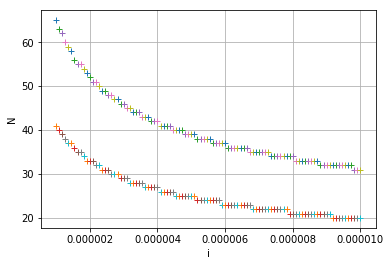

In [55]:
E = np.linspace(1e-6, 1e-5, 100)
for i in E:
    I, N1 = midpoint_rule(lambda x: x**3, 0, 1, i)
    I1, N2 = midpoint_rule(lambda x: x**3, 0, 1, i, double=True)
    plt.plot(i, N1, '+')
    plt.plot(i, N2, '+')
plt.xlabel("i")
plt.ylabel("N")
plt.grid()

plt.show()
#N-количество разбиений

### Test II.2

Now use your midpoint rule to compute the value of

$$
\int_0^1\! \frac{\sin{\sqrt{x}}}{x}\, dx
$$

up to a predefined accuracy of $\epsilon=10^{-4}$.

Note that the integral contains an integrable singularity at the lower limit. Do calculations two ways: first, do a straightforward computation; next, subtract the singularity. Compare the number of iterations required to achieve the accuracy of $\epsilon$.

(30% of the total grade)

In [53]:

def ff(x):
    return np.sin(x**0.5)/x
midpoint_rule(ff, 0, 1, eps = 1e-4)


(1.85042137398677, 211)

Вычтем из интеграла, а потом снова добавим $\frac{1}{\sqrt{x}}$ .
После этого разложим в ряд синус.
Таким образом, получаем два интеграла, значения одного из которых мы знаем-2.


In [54]:
def ff1(x):
    return ff(x)-x**(-0.5)
integrate = midpoint_rule(ff1, 0, 1, eps = 1e-4)
integrate[0] + 2 , integrate[1]


(1.8917648268960947, 9)